# EDA of final final and comparison with old file

This ile contains the results of an exploratory data analysis (EDA) on the final CRBA file of 2023. The purpose is to both summarize/ visualize the results, but also to use the analysis as a validation step and run some sanity checks. 

## 1. Preliminaries

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import numpy as np
from comparison_of_final_files.compare_two_final_csvs import FinalCrbaFileComparator

In [4]:
# Instantiate class
# TODO: Chang file paths here to point them to the right files
crba_final_2020 = pd.read_csv("D:\\Documents\\2023\\7_UNICEF\\major-dax-crba-etl\\crba-etl\\final_file_from_2020\\crba_final_sdmx_ready.csv", ";") 
crba_final_2023 = pd.read_csv("D:\\Documents\\2023\\7_UNICEF\\major-dax-crba-etl\\crba-etl\\config\\2023\\out\\data\\crba_final_sdmx_ready.csv", ";")

my_comparer = FinalCrbaFileComparator(
    crba_final_2020,
    crba_final_2023
)

# NB: df_2 is crba_final_2023

C:\Users\info\AppData\Local\Temp\ipykernel_44600\1251855413.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  crba_final_2020 = pd.read_csv("D:\\Documents\\2023\\7_UNICEF\\major-dax-crba-etl\\crba-etl\\final_file_from_2020\\crba_final_sdmx_ready.csv", ";")
C:\Users\info\AppData\Local\Temp\ipykernel_44600\1251855413.py:3: DtypeWarning: Columns (23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  crba_final_2020 = pd.read_csv("D:\\Documents\\2023\\7_UNICEF\\major-dax-crba-etl\\crba-etl\\final_file_from_2020\\crba_final_sdmx_ready.csv", ";")
C:\Users\info\AppData\Local\Temp\ipykernel_44600\1251855413.py:4: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  crba_final_2023 = pd.read_csv("D:\\Documents\\2023\\7_UNICEF\\major-dax-crba-etl\\crba-etl\\config\\2023\\out\\data\\crba_

# 2. EDA on final file

1. Number of NAN countries per indicator
2. Number of NA observations per country
3. Number of indicators per category
4. Top and bottom 5 countries overall and per INDEX

## 2.1 Numer of NAN countries per indicator

In [5]:
# Number of NAN countries per indicator
my_comparer.get_number_of_NA_per_column_value(
    my_comparer.df_2,
    column_for_per_category="INDICATOR_CODE"
)

INDICATOR_CODE
WP_DW_LF_FOWECO      0
WP_DW_LF_LAINCO      0
WP_DW_LF_HOWOCO      0
WP_DW_LF_FRASCO      0
WP_CL_LF_PRFOLC      0
                  ... 
MP_MA_LF_REMACH    160
CE_RD_EN_REGOEM    160
MP_PS_OC_ELWARE    164
WP_DW_EN_COBACO    176
WP_DW_EN_TRUNRE    186
Length: 198, dtype: int64

## 2.2 Numer of NA observations per country

In [6]:
# Number of NAN countries per indicator
my_comparer.get_number_of_NA_per_column_value(
    my_comparer.df_2,
    column_for_per_category="COUNTRY_ISO_3"
)

COUNTRY_ISO_3
GHA      5
GTM     10
MEX     10
COL     10
IDN     10
      ... 
PLW     76
PSE     76
LIE     86
MCO     87
XKX    139
Length: 195, dtype: int64

## 2.3 Numberer of indicators per category

In [7]:
my_comparer.get_number_of_indicators_per_column(
    df = my_comparer.df_1
)


 
 This is the number of indicators per INDICATOR_INDEX
INDICATOR_INDEX
WP    78
CE    72
MP    56
dtype: int64

 
 This is the number of indicators per INDICATOR_CATEGORY
INDICATOR_CATEGORY
LEG_FRAMEWORK_NAT         62
OUTCOME                   52
ENFORCEMENT               49
LEG_FRAMEWORK_INTERNAT    43
dtype: int64

 
 This is the number of indicators per INDICATOR_ISSUE
INDICATOR_ISSUE
DECENT_WORK_COND        33
MARKETING_ADV           25
CHLD_LABOUR             24
RESOURCE_ENV_DAMAGE     22
MAT_PAT_PROT            21
ONLINE_ABUSE_EXPL       19
SECURITY_ARRANGMENTS    17
CH_RIGHTS_FULLF         13
PROD_SAFETY             12
NAT_DISASTERS           11
LAND_RIGHTS              9
dtype: int64

 
 Lastly, this is the numer of indicators per all three of those categories
INDICATOR_INDEX  INDICATOR_CATEGORY      INDICATOR_ISSUE     
MP               LEG_FRAMEWORK_NAT       MARKETING_ADV           13
WP               LEG_FRAMEWORK_INTERNAT  DECENT_WORK_COND        11
                 LEG

In [8]:
my_comparer.get_number_of_indicators_per_column(
    df = my_comparer.df_2
)


 
 This is the number of indicators per INDICATOR_INDEX
INDICATOR_INDEX
WP    72
CE    71
MP    55
dtype: int64

 
 This is the number of indicators per INDICATOR_CATEGORY
INDICATOR_CATEGORY
LEG_FRAMEWORK_NAT         59
OUTCOME                   49
ENFORCEMENT               47
LEG_FRAMEWORK_INTERNAT    43
dtype: int64

 
 This is the number of indicators per INDICATOR_ISSUE
INDICATOR_ISSUE
DECENT_WORK_COND        32
MARKETING_ADV           25
CHLD_LABOUR             22
RESOURCE_ENV_DAMAGE     22
MAT_PAT_PROT            18
ONLINE_ABUSE_EXPL       18
SECURITY_ARRANGMENTS    16
CH_RIGHTS_FULLF         13
PROD_SAFETY             12
NAT_DISASTERS           11
LAND_RIGHTS              9
dtype: int64

 
 Lastly, this is the numer of indicators per all three of those categories
INDICATOR_INDEX  INDICATOR_CATEGORY      INDICATOR_ISSUE     
MP               LEG_FRAMEWORK_NAT       MARKETING_ADV           13
WP               LEG_FRAMEWORK_INTERNAT  DECENT_WORK_COND        11
CE               LEG

## 2.4 Top and bottom 5 countries overall

In [9]:
my_comparer.get_top_and_worst_countries_per_category("OVERALL", num=10)

Top 10 countries:     COUNTRY_ISO_3  OVERALL_SCORE
56            FIN       8.373213
12            BEL       8.309028
129           NOR       8.198827
30            CHE       8.193944
47            DNK       8.182195
44            DEU       8.181979
43            CZE       8.174881
58            FRA       8.149933
104           LUX       8.149376
164           SWE       8.106375
Bottom 10 countries:     COUNTRY_ISO_3  OVERALL_SCORE
157           SOM       2.859552
159           SSD       3.369618
28            CAF       3.738651
52            ERI       3.763628
191           YEM       3.861993
35            COD       3.928215
167           SYR       4.009210
74            HTI       4.033649
0             AFG       4.097803
138           PLW       4.139547
Top 10 countries:     COUNTRY_ISO_3  OVERALL_SCORE
56            FIN       8.373213
12            BEL       8.309028
129           NOR       8.198827
30            CHE       8.193944
47            DNK       8.182195
44            DEU  

d:\Documents\2023\7_UNICEF\major-dax-crba-etl\crba-etl\validation\comparison_of_final_files\compare_two_final_csvs.py:131: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = self.df_2.groupby("COUNTRY_ISO_3", as_index=False).mean()


In [10]:
my_comparer.get_top_and_worst_countries_per_category("INDEX", num=10)

Calculating top and bottom countrie for INDICATORINDEX ==  WP
Top 10 countries:     COUNTRY_ISO_3  INDEX_SCORE
494           SWE     8.429207
389           NOR     8.366630
143           DNK     8.281572
170           FIN     8.201389
491           SVN     8.175813
38            BEL     8.146372
92            CHE     8.145654
176           FRA     8.126893
131           CZE     8.110663
134           DEU     8.080821
Bottom 10 countries:     COUNTRY_ISO_3  INDEX_SCORE
479           SSD     2.350688
179           FSM     2.564392
158           ERI     2.615671
473           SOM     2.654470
524           TON     3.072884
416           PLW     3.132077
167           ETH     3.432808
503           SYR     3.470236
506           TCD     3.537898
380           NGA     3.543036
Top 10 countries:     COUNTRY_ISO_3  INDEX_SCORE
494           SWE     8.429207
389           NOR     8.366630
143           DNK     8.281572
170           FIN     8.201389
491           SVN     8.175813
38           

d:\Documents\2023\7_UNICEF\major-dax-crba-etl\crba-etl\validation\comparison_of_final_files\compare_two_final_csvs.py:141: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = self.df_2.groupby(["COUNTRY_ISO_3", "INDICATOR_INDEX"], as_index=False).mean()


## 2.5 Sanity check: All indicators where Indonesia is better than Germany

All indicators where Indonesia is better than Germany have been re-doublechecked to verify that the data processing is correct. 

For all indiators below, no processing errors were found. We double checked and the fact that Indonesia scores better than Germany is also reflected in the source data. (note: other country pairs can be taken)

In [13]:
my_comparer.compare_two_countries(my_comparer.df_2, country_1="DEU", country_2="IDN")

COUNTRY_ISO_3,DEU,IDN,DIFF_DEU_IDN
INDICATOR_CODE,,,
CE_FC_EN_EDUSPE,3.76,7.47,-3.71
CE_ND_EN_NASASF,5.75,8.75,-3.00
CE_RD_LF_RIENCO,0.00,5.00,-5.00
CE_RD_OC_GRGAEM,5.17,5.95,-0.78
CE_SA_LF_UNRECP,0.00,10.00,-10.00
MP_MA_EN_REMABS,3.79,5.06,-1.27
MP_MA_LF_BAAANT,5.00,10.00,-5.00
MP_MA_LF_BAAAPM,0.00,10.00,-10.00
MP_MA_LF_IICMBS,3.33,6.67,-3.34


# 3. Comparison of files of 2023 and 2020

1. Comparison of existing olumns
2. Compare distributions of `TIME_PERIOD` 
3. Compare distribution of scores
    5.1 Overall score
    5.2 Score per INDEX
4. Which country has improved/ worsened most? 
5. For which observations has `TIME_PERIOD` become older?
6. Which indicators have been retired/ added between 2020 and 2023?
7. Percentage of observations for which we have new data
8. Distribution of rank change

## 3.1 Comparison of existing column

In [12]:
my_comparer.compare_existing_columns()
# The source which had the dimension DIM_MANAGEMENT_LEVEL is no longer providing this dimension column. Therefore, it is no longer present in 2023.  

Columns that are in df_1 which aren_t in df_2 {'DIM_MANAGEMENT_LEVEL'}
Columns that are in df_2 which aren_t in df_1 set()


## 3.2. Comparison of distributions of TIME_PERIOD

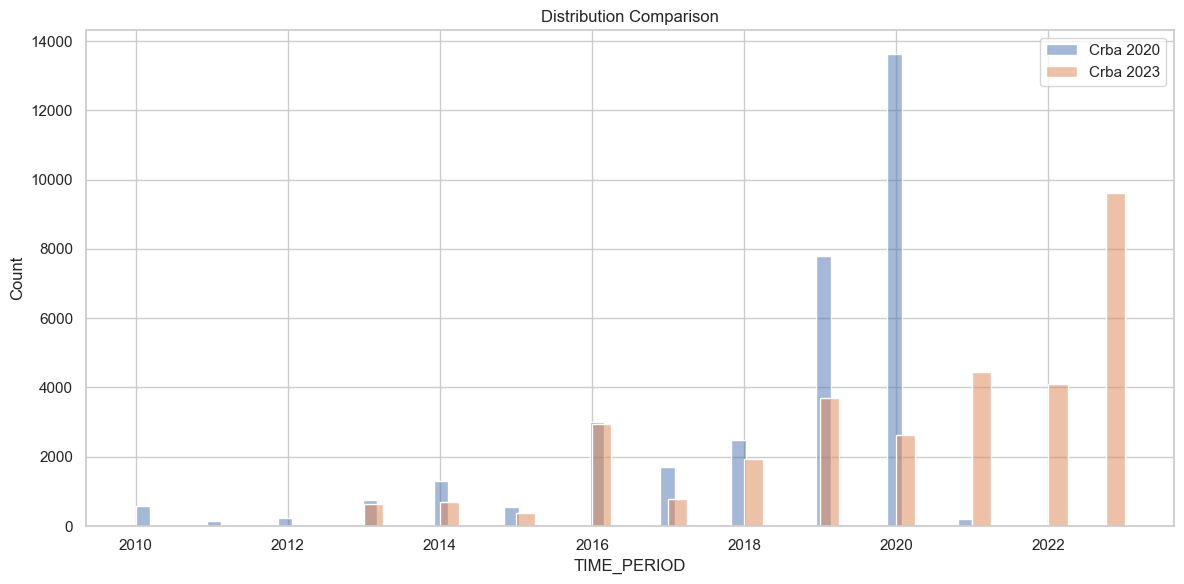

In [14]:
my_comparer.compare_column_distribution("TIME_PERIOD")

## 3.3 Comparison of distributions of scores
### 3.3.1 Comparison of single indicator scores of countries (variable `SCALED_OBS_VALUE`)

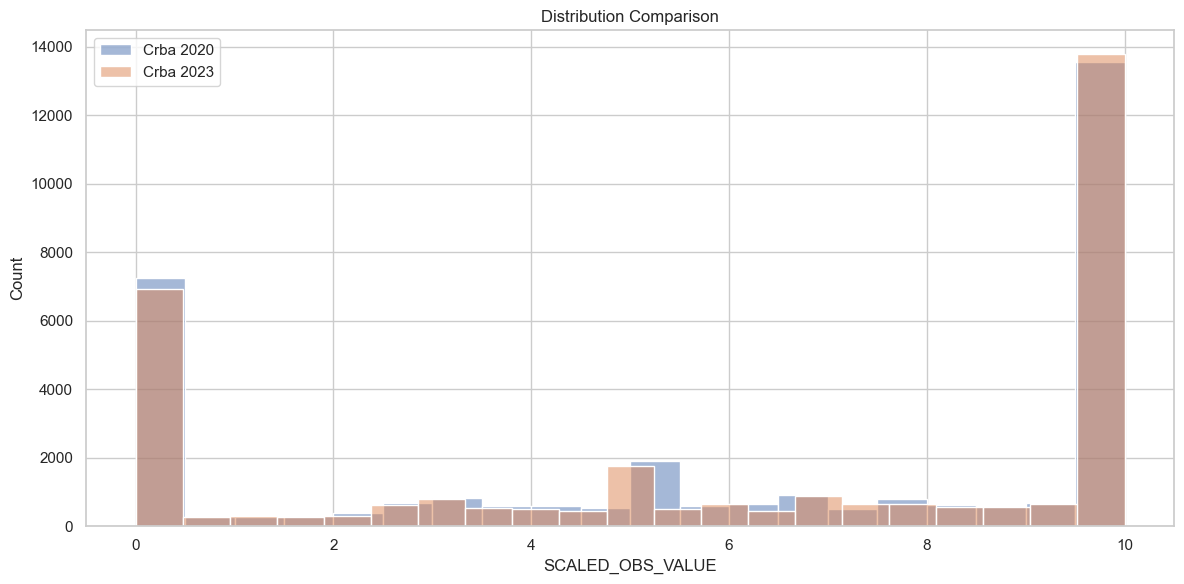

In [15]:
my_comparer.compare_column_distribution("SCALED_OBS_VALUE")

### 3.3.2 Comparison of countries' OVERALL_SCORE (average of index scores, variable `OVERALL_SCORE`) 

5.872051934586483
5.993357104792258


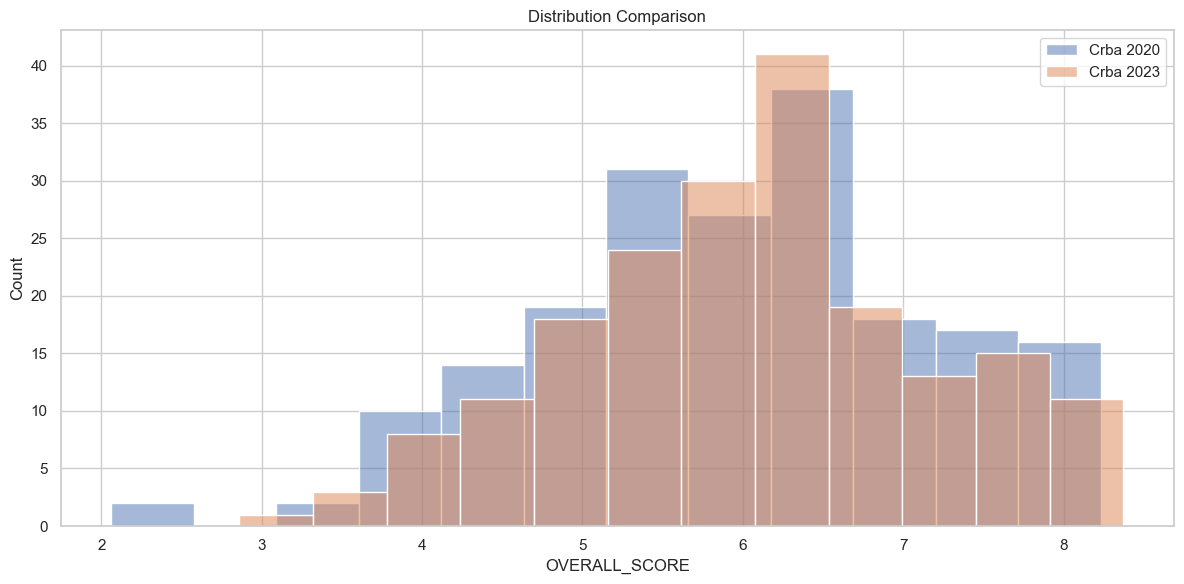

In [17]:
print(my_comparer.df_1["OVERALL_SCORE"].mean())
print(my_comparer.df_2["OVERALL_SCORE"].mean())
my_comparer.compare_column_distribution("OVERALL_SCORE", aggregate_to_country=True)

## 3.3.3 Score per Index

WP


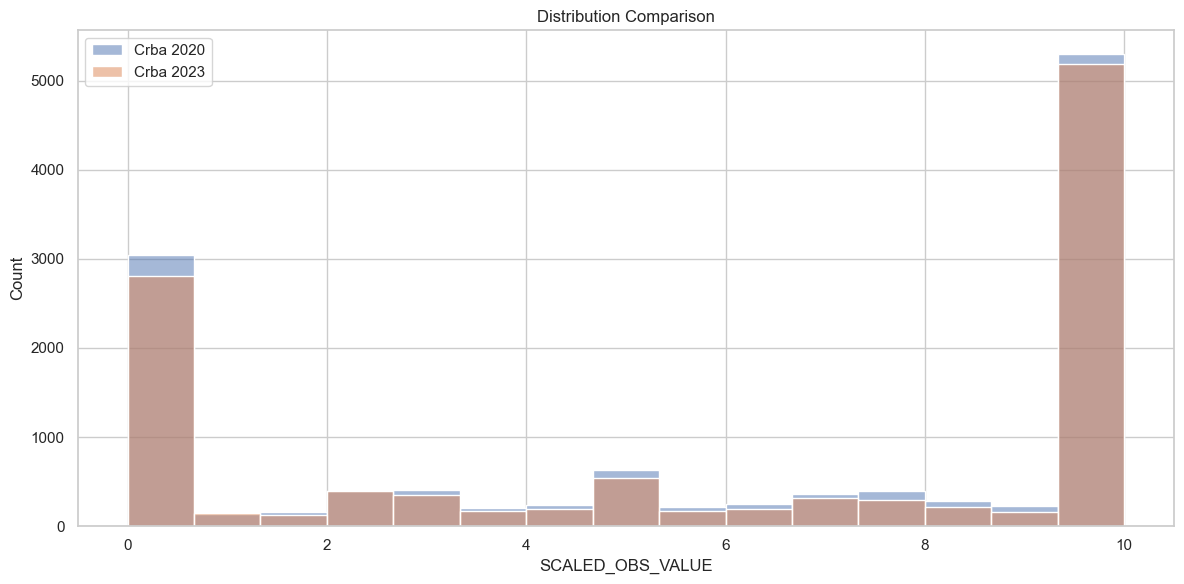

CE


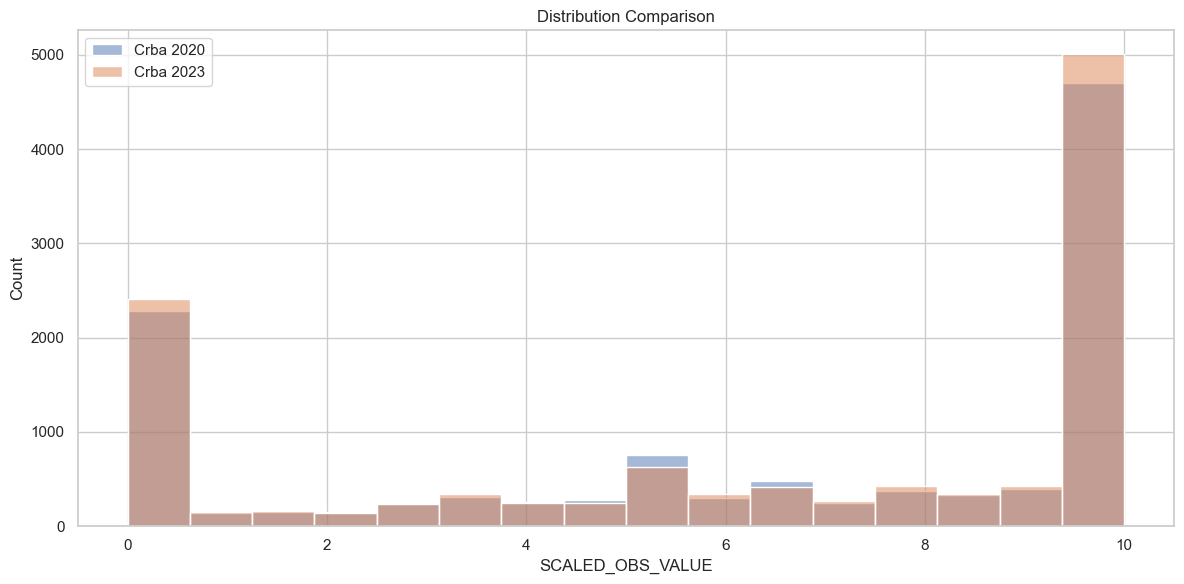

MP


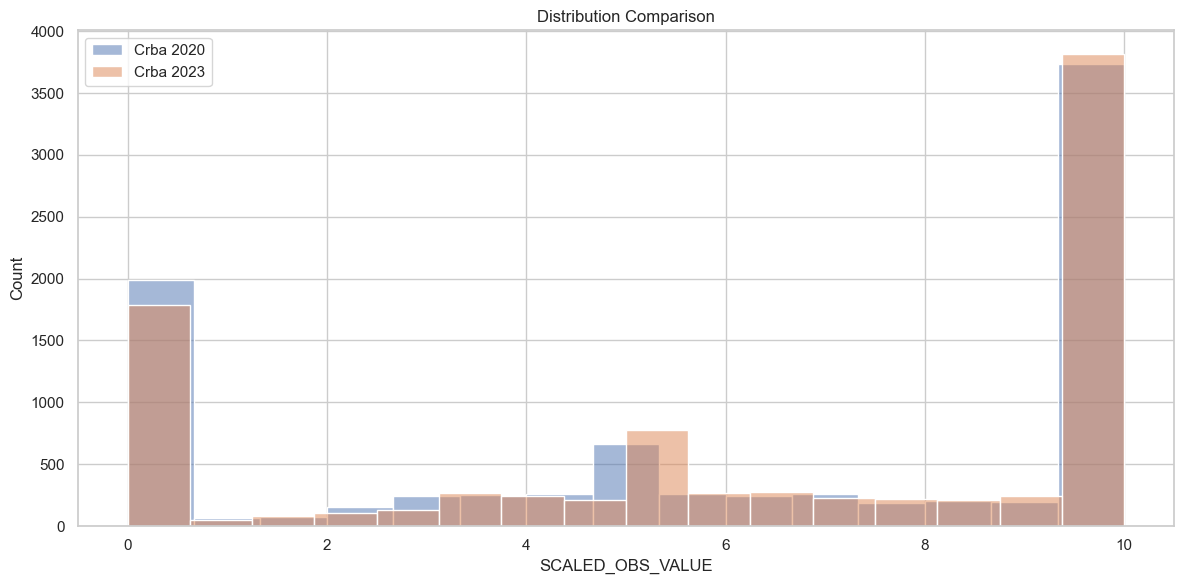

In [18]:
index_list=[
    "WP", 
    "CE", 
    "MP", 
]

for i in index_list:
    print(i)
    my_comparer.compare_column_distribution(
        column_name="SCALED_OBS_VALUE",
        filter_to_subset_df_1=my_comparer.df_1_filtered['INDICATOR_INDEX']==i,
        filter_to_subset_df_2=my_comparer.df_2_filtered['INDICATOR_INDEX']==i
    )

### 3.3.4 Per issue

In [ ]:
# issue_list=[
#     ["CHLD_LABOUR", "Child labour"],
#     ["ONLINE_ABUSE_EXPL", "Online Abuse and exploitation"],
#     ["MARKETING_ADV", "Marketing and Advertising"],
#     ["RESOURCE_ENV_DAMAGE", "Resource use and damage to the environment"],
#     ["LAND_RIGHTS", "Land rights"],
#     ["SECURITY_ARRANGMENTS", "Security arrangements"],
#     ["NAT_DISASTERS", "Natural disasters"],
#     ["CH_RIGHTS_FULLF", "Fulfillment of children’s rights"],
#     ["DECENT_WORK_COND", "Decent working conditions"],
#     ["MAT_PAT_PROT", "Maternity and paternity protection"],
# ]

# for i in index_list:
#     print(i)
#     my_comparer.compare_column_distribution(
#         column_name="SCALED_OBS_VALUE",
#         filter_to_subset_df_1=my_comparer.df_1_filtered['INDICATOR_ISSUE']==i[0],
#         filter_to_subset_df_2=my_comparer.df_2_filtered['INDICATOR_ISSUE']==i[1]
#     )

## 3.4 Which country has improved/ worsened most?

Top 10 countries which improved most: 
 
     COUNTRY_ISO_3  OVERALL_SCORECHANGE
159           SSD             1.121821
45            DJI             0.842883
157           SOM             0.797194
64            GIN             0.725303
172           TKM             0.688655
91            KIR             0.675806
65            GMB             0.673209
41            CUB             0.666016
148           RWA             0.653601
122           MWI             0.645539

 
 
 Bottom 10 countries which worsened most: 
 
     COUNTRY_ISO_3  OVERALL_SCORECHANGE
94            KWT            -0.616005
176           TUN            -0.529248
80            IRQ            -0.382138
175           TTO            -0.380173
133           OMN            -0.378414
75            HUN            -0.365549
123           MYS            -0.332025
70            GTM            -0.325779
115           MLT            -0.301409
0             AFG            -0.296717


d:\Documents\2023\7_UNICEF\major-dax-crba-etl\crba-etl\validation\comparison_of_final_files\compare_two_final_csvs.py:160: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  def compute_country_score_changes(self, target_col):
d:\Documents\2023\7_UNICEF\major-dax-crba-etl\crba-etl\validation\comparison_of_final_files\compare_two_final_csvs.py:161: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df_1 = self.df_1.groupby("COUNTRY_ISO_3", as_index=False).mean()


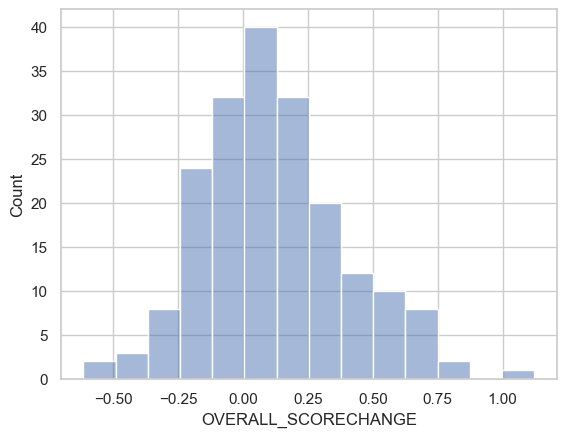

In [19]:
my_comparer.compute_country_score_changes(target_col="OVERALL_SCORE")

## 3.5 For which observations has TIME_PERIOD become older?

In [20]:
my_comparer.calculate_percentage_of_updated_observations()

This is the total number or rows in the merged_df: 30213
This is the number of observations for which 2020 has a newer value than 2023: 975
Number of rows where TIME_PERIOD in df_2 is higher than in df_1: 20750
Percentage of rows where TIME_PERIOD in df_2 is higher than in df_1: 68.68%


## 3.6 Which indicators have been retired/ added between 2020 and 2023? 

In [22]:
my_comparer.find_unique_values("INDICATOR_CODE")
# Double checked: All indicators whichare in df_1 and not in df_2 have a ticket and we decided to retire them

Unique values only in DataFrame  1 ():
{'WP_MP_OC_COMALE', 'WP_CL_LF_CSAELF', 'WP_MP_OC_MACABE', 'WP_CL_OC_PRHAWA', 'WP_DW_LF_FREASS', 'WP_MP_EN_MALECB', 'MP_OL_EN_CSAEGC', 'CE_SA_LF_USCHHP', 'MP_OL_OC_CHSAEE'}

Unique values only in DataFrame 2:
{'MP_OL_OC_ROCSEM'}


## 3.7 Compairson of length of dataframe

In [23]:
my_comparer.compare_number_of_rows()

The number of rows in df_1 are: 57637
The number of rows in df_2 are: 59070


## 3.8 Compute distribution of rank changes

d:\Documents\2023\7_UNICEF\major-dax-crba-etl\crba-etl\validation\comparison_of_final_files\compare_two_final_csvs.py:160: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  def compute_country_score_changes(self, target_col):
d:\Documents\2023\7_UNICEF\major-dax-crba-etl\crba-etl\validation\comparison_of_final_files\compare_two_final_csvs.py:161: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df_1 = self.df_1.groupby("COUNTRY_ISO_3", as_index=False).mean()


Top 10 countries which improved most: 
 
     COUNTRY_ISO_3  RANK_OVERALL_SCORECHANGE
77            IND                      41.0
51            EGY                      37.0
151           SEN                      37.0
172           TKM                      33.0
41            CUB                      32.0
148           RWA                      28.0
166           SYC                      27.0
65            GMB                      25.0
88            KEN                      25.0
99            LCA                      25.0

 
 
 Bottom 10 countries which worsened most: 
 
     COUNTRY_ISO_3  RANK_OVERALL_SCORECHANGE
94            KWT                     -47.0
176           TUN                     -40.0
21            BLZ                     -31.0
133           OMN                     -31.0
70            GTM                     -27.0
79            IRN                     -27.0
175           TTO                     -27.0
80            IRQ                     -26.0
123           MYS          

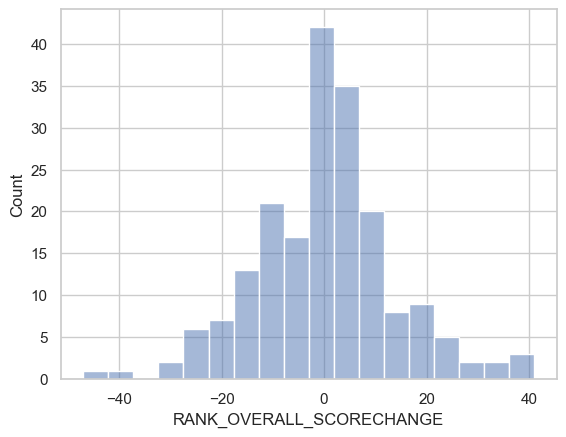

In [24]:
my_comparer.compute_country_score_changes(target_col="RANK_OVERALL_SCORE")

# 4 Export of datasets for further manual validation and sanity checks

Compute the aggregate scores for all aggregation levels and create a wide-form dataframe

In [25]:
# Compute aggregated scores and add overall score: 2020
aggregated_scores_2020 = my_comparer.create_aggregate_scores_df(my_comparer.df_1)
aggregated_scores_2020 = aggregated_scores_2020.merge(my_comparer.df_1[["COUNTRY_ISO_3", "OVERALL_SCORE"]].groupby("COUNTRY_ISO_3").first(), on="COUNTRY_ISO_3", how="left")
aggregated_scores_2020 = aggregated_scores_2020.add_suffix('_2020')

# Compute aggregated scores and add overall score: 2023
aggregated_scores_2023 = my_comparer.create_aggregate_scores_df(my_comparer.df_2)
aggregated_scores_2023 = aggregated_scores_2023.merge(my_comparer.df_2[["COUNTRY_ISO_3", "OVERALL_SCORE"]].groupby("COUNTRY_ISO_3").first(), on="COUNTRY_ISO_3", how="left")
aggregated_scores_2023 = aggregated_scores_2023.add_suffix('_2023')

C:\Users\info\AppData\Local\Temp\ipykernel_44600\453217776.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (4 levels on the left, 1 on the right)
  aggregated_scores_2020 = aggregated_scores_2020.merge(my_comparer.df_1[["COUNTRY_ISO_3", "OVERALL_SCORE"]].groupby("COUNTRY_ISO_3").first(), on="COUNTRY_ISO_3", how="left")
C:\Users\info\AppData\Local\Temp\ipykernel_44600\453217776.py:8: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (4 levels on the left, 1 on the right)
  aggregated_scores_2023 = aggregated_scores_2023.merge(my_comparer.df_2[["COUNTRY_ISO_3", "OVERALL_SCORE"]].groupby("COUNTRY_ISO_3").first(), on="COUNTRY_ISO_3", how="left")


In [26]:
# Join df
aggregated_scores_combined = aggregated_scores_2020.merge(aggregated_scores_2023, on="COUNTRY_ISO_3", suffixes=("_2020", "_2023"))

# Compute overall score diff
aggregated_scores_combined["OVERALL_SCORE_DIFF"] = aggregated_scores_combined["OVERALL_SCORE_2023"] - aggregated_scores_combined["OVERALL_SCORE_2020"]

# Add country names
country_list = pd.read_json('D:\\Documents\\2023\\7_UNICEF\\major-dax-crba-etl\\crba-etl\\etl\\resources\\crba_country_list.json')
aggregated_scores_combined = aggregated_scores_combined.merge(country_list, on="COUNTRY_ISO_3", how="left")

In [27]:
# Export
aggregated_scores_combined.round(2).sort_index(axis=1).to_excel("aggregated_scores.xlsx")